In [16]:
import Bio.PDB
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [17]:
def radians_to_degrees(rad_angle):
    if rad_angle is None:
        return None
    angle = rad_angle * 180 / math.pi
    while angle > 180:
        angle = angle - 360
    while angle < -180:
        angle = angle + 360
    return angle

In [18]:
def get_phi_psy(name, location):
    data = pd.DataFrame()
    for model in Bio.PDB.PDBParser().get_structure(name, location):
        for chain in model:
            polypeptides = Bio.PDB.PPBuilder().build_peptides(chain)
            for poly in polypeptides:
                phi_psi_list = poly.get_phi_psi_list()
                for phi, psi in phi_psi_list:
                    data = data.append(pd.DataFrame({'phi' : [radians_to_degrees(phi)],
                                                     'psi' : [radians_to_degrees(psi)], 
                                                     'chain_id' : [chain.id]}), ignore_index=True)
    return data

In [23]:
def ramachandran_plot(data):
    colors = ['#FF5733', '#689F22','#8CAAF3', '#DCFA04', '#FA049D', '#172383']
    patches = []
    plt.clf()
    for color_id, chain_id in enumerate(data.chain_id.unique()):
        plt.scatter(x='phi', y='psi', 
                    data=data.loc[data.chain_id==chain_id], color=colors[color_id])
        patch = mpatches.Patch(color=colors[color_id], label="chain " + chain_id)
        patches.append(patch)
    plt.xlabel('phi', color='r')
    plt.ylabel('psi', color='r')
    ax = plt.gca()
    ax.spines['top'].set_position('center')
    ax.spines['right'].set_position('center')
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.legend(handles=patches)
    plt.show()

/opt/miniconda3/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1858.
  PDBConstructionWarning,
/opt/miniconda3/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1930.
  PDBConstructionWarning,
/opt/miniconda3/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain Q is discontinuous at line 2007.
  PDBConstructionWarning,


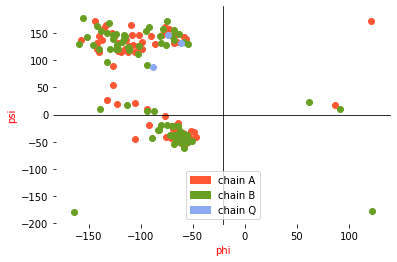

In [24]:
#6JHZ
ramachandran_plot(get_phi_psy("6JHZ", "peptides/6jhz.pdb"))

/opt/miniconda3/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13156.
  PDBConstructionWarning,


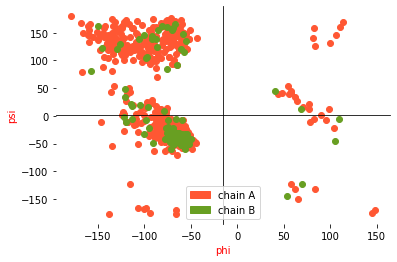

In [25]:
#6KGK
ramachandran_plot(get_phi_psy("6KGK", "peptides/6kgk.pdb"))

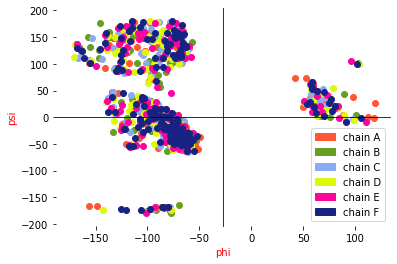

In [26]:
#6L93
ramachandran_plot(get_phi_psy("6L93", "peptides/6l93.pdb"))